# Load Data into Dataframes and modify

In [66]:
# from formulas import *
from statsmodels.tsa.arima.model import ARIMA
from sklearn import metrics
# import formulas as fl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
%matplotlib inline  

In [67]:
spy = pd.read_csv('SPY.csv')
dia = pd.read_csv('MSFT.csv')
qqq = pd.read_csv('TSLA.csv')
btc = yf.Ticker("BTC-USD").history(period="max")


spy['Date'] = pd.to_datetime(spy['Date'])
dia['Date'] = pd.to_datetime(dia['Date'])
qqq['Date'] = pd.to_datetime(qqq['Date'])



In [68]:

spy["day_return"] = spy["Close"].pct_change()
dia["day_return"] = dia["Close"].pct_change()
btc["day_return"] = btc['Close'].pct_change()

spy['log_day_return'] = np.log(spy['Close']) - np.log(spy['Close'].shift(1))
dia['log_day_return'] = np.log(dia['Close']) - np.log(dia['Close'].shift(1))

spy = spy.iloc[1:]
dia = dia.iloc[1:]
btc = btc.iloc[1:]


### Arima Model

In [69]:
def get_arima_accuracy():
    print("61.23454234")

In [70]:
# f=20
# r=1
# df = pd.DataFrame(btc.loc[:, 'Close'])
# temp = list(df['Close'])
# l = len(temp)
# temp = temp[l-f-150:l-f]
# dr=temp
# # dr = [i-min(temp) for i in temp]


# for i in range(r):
#     model = ARIMA(dr, order=(100,1,1),enforce_stationarity=False, enforce_invertibility=False)
#     model_fit = model.fit()

#     forecast = model_fit.forecast(steps=f)
#     dr+=list(forecast)


# plt.plot(dr)

# plt.xlabel("Days")
# plt.ylabel("Close")
# plt.show()

# plt.plot(dr[-f*r:], label='Prediction')
# plt.plot(list(btc['Close'])[-f*r:], label='Actual')
# plt.xlabel("Days")
# plt.ylabel("Close")
# plt.legend()
# plt.show()

In [71]:
# f=100
# r=1
# df = pd.DataFrame(btc.loc[:, 'day_return'])
# temp = list(df['day_return'])
# l = len(temp)
# temp = temp[l-200-f:l-f]
# dr=temp
# # dr = [i-min(temp) for i in temp]



# for i in range(r):
#     model = ARIMA(dr, order=(5,1,5),enforce_stationarity=True, enforce_invertibility=False)
#     model_fit = model.fit()

#     forecast = model_fit.forecast(steps=f)
#     dr+=list(forecast)


# plt.plot(dr)

# plt.xlabel("Days")
# plt.ylabel("Day Return")
# plt.show()

# plt.plot(dr[-f*r:], label='Prediction')
# plt.plot(list(btc['day_return'])[-f*r:], label='Actual')
# plt.xlabel("Days")
# plt.ylabel("Day Return")
# plt.legend()
# plt.show()


[0.04596171114078618, 0.017704551212910147, 0.012951348577769028, 0.01698899533192111, -0.01939436147960416, 0.08211740099467768, 0.0401919693193753, -0.006742410894342465, -0.0028884421706671937, -0.01941107679491816, -0.010983941711781742, 0.006395837363315726, -0.05517510011323534, -0.005708686992848544, 0.0796052030234431, 0.0398306162434614, -0.0016462880701044735, -0.006235163651508224, -0.013497960448739299, -0.0009725914343493569, -0.014415336683737068, -0.0057275961266136655, -0.009434736504108754, 0.029091011085651708, -0.014085221654344782, 0.009346662498644243, 0.02733856978257987, -0.02709709734425869, 0.033815983988709775, 0.00041284726535173455, 0.018586602023192844, 0.0008708010561344626, -0.004288162539464846, -0.007498615226969818, -0.010510085263709001, -0.02291530796119967, -0.005281958173694035, -0.10059931398792521, 0.013819043648011897, 0.01738918520335342, -0.006279006699941081, 0.006036741981122917, -0.006181150878381003, 0.009623023027591993, -0.06207539958496

c:\Users\ronad\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


[0.04596171114078618, 0.017704551212910147, 0.012951348577769028, 0.01698899533192111, -0.01939436147960416, 0.08211740099467768, 0.0401919693193753, -0.006742410894342465, -0.0028884421706671937, -0.01941107679491816, -0.010983941711781742, 0.006395837363315726, -0.05517510011323534, -0.005708686992848544, 0.0796052030234431, 0.0398306162434614, -0.0016462880701044735, -0.006235163651508224, -0.013497960448739299, -0.0009725914343493569, -0.014415336683737068, -0.0057275961266136655, -0.009434736504108754, 0.029091011085651708, -0.014085221654344782, 0.009346662498644243, 0.02733856978257987, -0.02709709734425869, 0.033815983988709775, 0.00041284726535173455, 0.018586602023192844, 0.0008708010561344626, -0.004288162539464846, -0.007498615226969818, -0.010510085263709001, -0.02291530796119967, -0.005281958173694035, -0.10059931398792521, 0.013819043648011897, 0.01738918520335342, -0.006279006699941081, 0.006036741981122917, -0.006181150878381003, 0.009623023027591993, -0.06207539958496

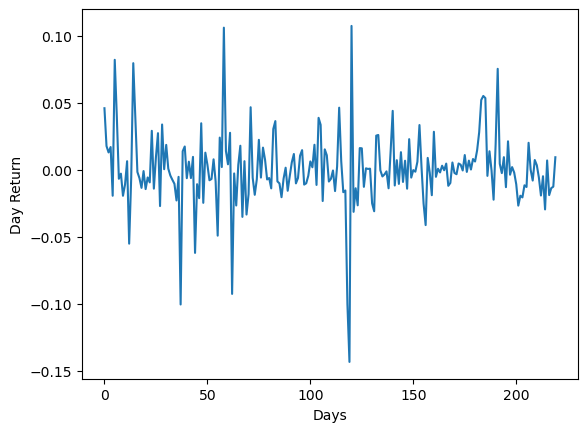

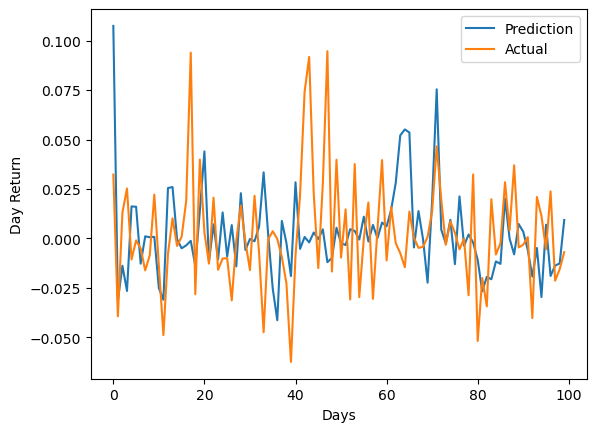

In [72]:
import joblib
f=100
r=1
df = pd.DataFrame(btc.loc[:, 'day_return'])
temp = list(df['day_return'])
l = len(temp)
temp = temp[l-200-f:l-f]
dr=temp
print(dr)

loaded_model = joblib.load('finalized_arima.sav')
loaded_model = loaded_model.fit()
forecast = loaded_model.forecast(steps=20)
#  model = ARIMA(dr, order=(5,1,5),enforce_stationarity=True, enforce_invertibility=False)
#     model_fit = model.fit()

#     forecast = model_fit.forecast(steps=f)
dr+=list(forecast)
print(dr)


plt.plot(dr)

plt.xlabel("Days")
plt.ylabel("Day Return")
plt.show()

plt.plot(dr[-f*r:], label='Prediction')
plt.plot(list(btc['day_return'])[-f*r:], label='Actual')
plt.xlabel("Days")
plt.ylabel("Day Return")
plt.legend()
plt.show()


In [85]:
test = list(btc['day_return'])[-20:]
pred = dr[-50:-30]
Y = []
y = []
for i in range(len(test)):
    diff = test[i]-pred[i]
    err = 100*(pred[i])/test[i]
    if abs(err)>500:
        continue
    y.append(pred[i])
    Y.append(test[i])
s = 0
for i in range(len(Y)):
    s += (Y[i]-y[i])**2
s = s/len(Y)
s = s**0.5
print("RMSE(OWN):",s)
acc = []
for i in range(len(Y)):
    acc.append(abs((y[i] - Y[i])/Y[i]))
print("mean acc: "+str(np.mean([abs((1-acc[i])*100) for i in range(len(Y))])))
#MAE
print("MAE: "+str(metrics.mean_absolute_error(Y,y)))
# RMSE
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(Y,y))))
# MSE
print("MSE: "+str(metrics.mean_squared_error(Y,y)))
# MAPE
print("MAPE: "+str(metrics.mean_absolute_percentage_error(Y, y)))

a = y[0]
b = Y[0]
p=0
for i in range(1,len(Y)):
    _pred=y[i]-a
    _test = Y[i]-b
    if _pred<0 and _test<0 or _pred > 0 and _test > 0 or _test==_pred:
        p+=1
p/(len(y)-1)

RMSE(OWN): 0.03099215695928936
mean acc: 85.89442017901953
MAE: 0.026155679916969335
RMSE: 0.03099215695928936
MSE: 0.000960513792989228
MAPE: 1.7684720565392216


0.8235294117647058

In [75]:
test

[-0.0518092051895368,
 -0.020008250880993006,
 -0.034308522518338824,
 0.01981858797984626,
 -0.008128524647254443,
 -0.002393679129772508,
 0.02841955147295372,
 0.004066170397882152,
 0.036980508331842854,
 -0.00453030993708059,
 -0.0031279011203009244,
 0.000694680667924441,
 -0.04022160164248023,
 0.020966033026897257,
 0.01135862564681589,
 -0.005467695268338013,
 0.023803407820215394,
 -0.021323001096775096,
 -0.015556145829018653,
 -0.006885603072671831]

In [76]:
pred

[-0.010800565950449294,
 -0.026752362059539608,
 -0.019385699020974482,
 -0.02063836807884041,
 -0.011598290453205552,
 -0.012843908729745623,
 0.020150075032921943,
 -2.1930501283448645e-05,
 -0.0080379579337463,
 0.007300546014241812,
 0.003395841215450881,
 -0.0058472360313361876,
 -0.019213367011421043,
 -0.00481747967596774,
 -0.029601985298774496,
 0.006948894220501746,
 -0.01893541102613792,
 -0.01370671913760815,
 -0.012617179075291049,
 0.009358795416961963]

In [78]:
dr[-20:]

[-0.010800565950449294,
 -0.026752362059539608,
 -0.019385699020974482,
 -0.02063836807884041,
 -0.011598290453205552,
 -0.012843908729745623,
 0.020150075032921943,
 -2.1930501283448645e-05,
 -0.0080379579337463,
 0.007300546014241812,
 0.003395841215450881,
 -0.0058472360313361876,
 -0.019213367011421043,
 -0.00481747967596774,
 -0.029601985298774496,
 0.006948894220501746,
 -0.01893541102613792,
 -0.01370671913760815,
 -0.012617179075291049,
 0.009358795416961963]